In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [26]:
# load data
# since the timestamp starts at 0, we should more one timestamp more for every day

prices_d0 = pd.read_csv('data/prices_round_3_day_0.csv', delimiter=';')
prices_d1 = pd.read_csv('data/prices_round_3_day_1.csv', delimiter=';')
prices_d1["timestamp"] += prices_d0["timestamp"].iloc[-1] + 100
prices_d2 = pd.read_csv('data/prices_round_3_day_2.csv', delimiter=';')
prices_d2["timestamp"] += prices_d1["timestamp"].iloc[-1] + 100

prices = pd.concat([prices_d0, prices_d1, prices_d2])


In [4]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2,2999600,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
39996,2,2999700,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
39997,2,2999700,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
39998,2,2999700,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [91]:
prices["mid_price"] = prices["ask_price_1"] - prices["bid_price_1"]

In [30]:
trades_d0 = pd.read_csv('data/trades_round_3_day_0_nn.csv', delimiter=';')
trades_d1 = pd.read_csv('data/trades_round_3_day_1_nn.csv', delimiter=';')
trades_d1["timestamp"] += trades_d0["timestamp"].iloc[-1] + 100
trades_d2 = pd.read_csv('data/trades_round_3_day_2_nn.csv', delimiter=';')
trades_d2["timestamp"] += trades_d1["timestamp"].iloc[-1] + 100

trades = pd.concat([trades_d0, trades_d1, trades_d2])

# del trades_d0, trades_d1, trades_d2

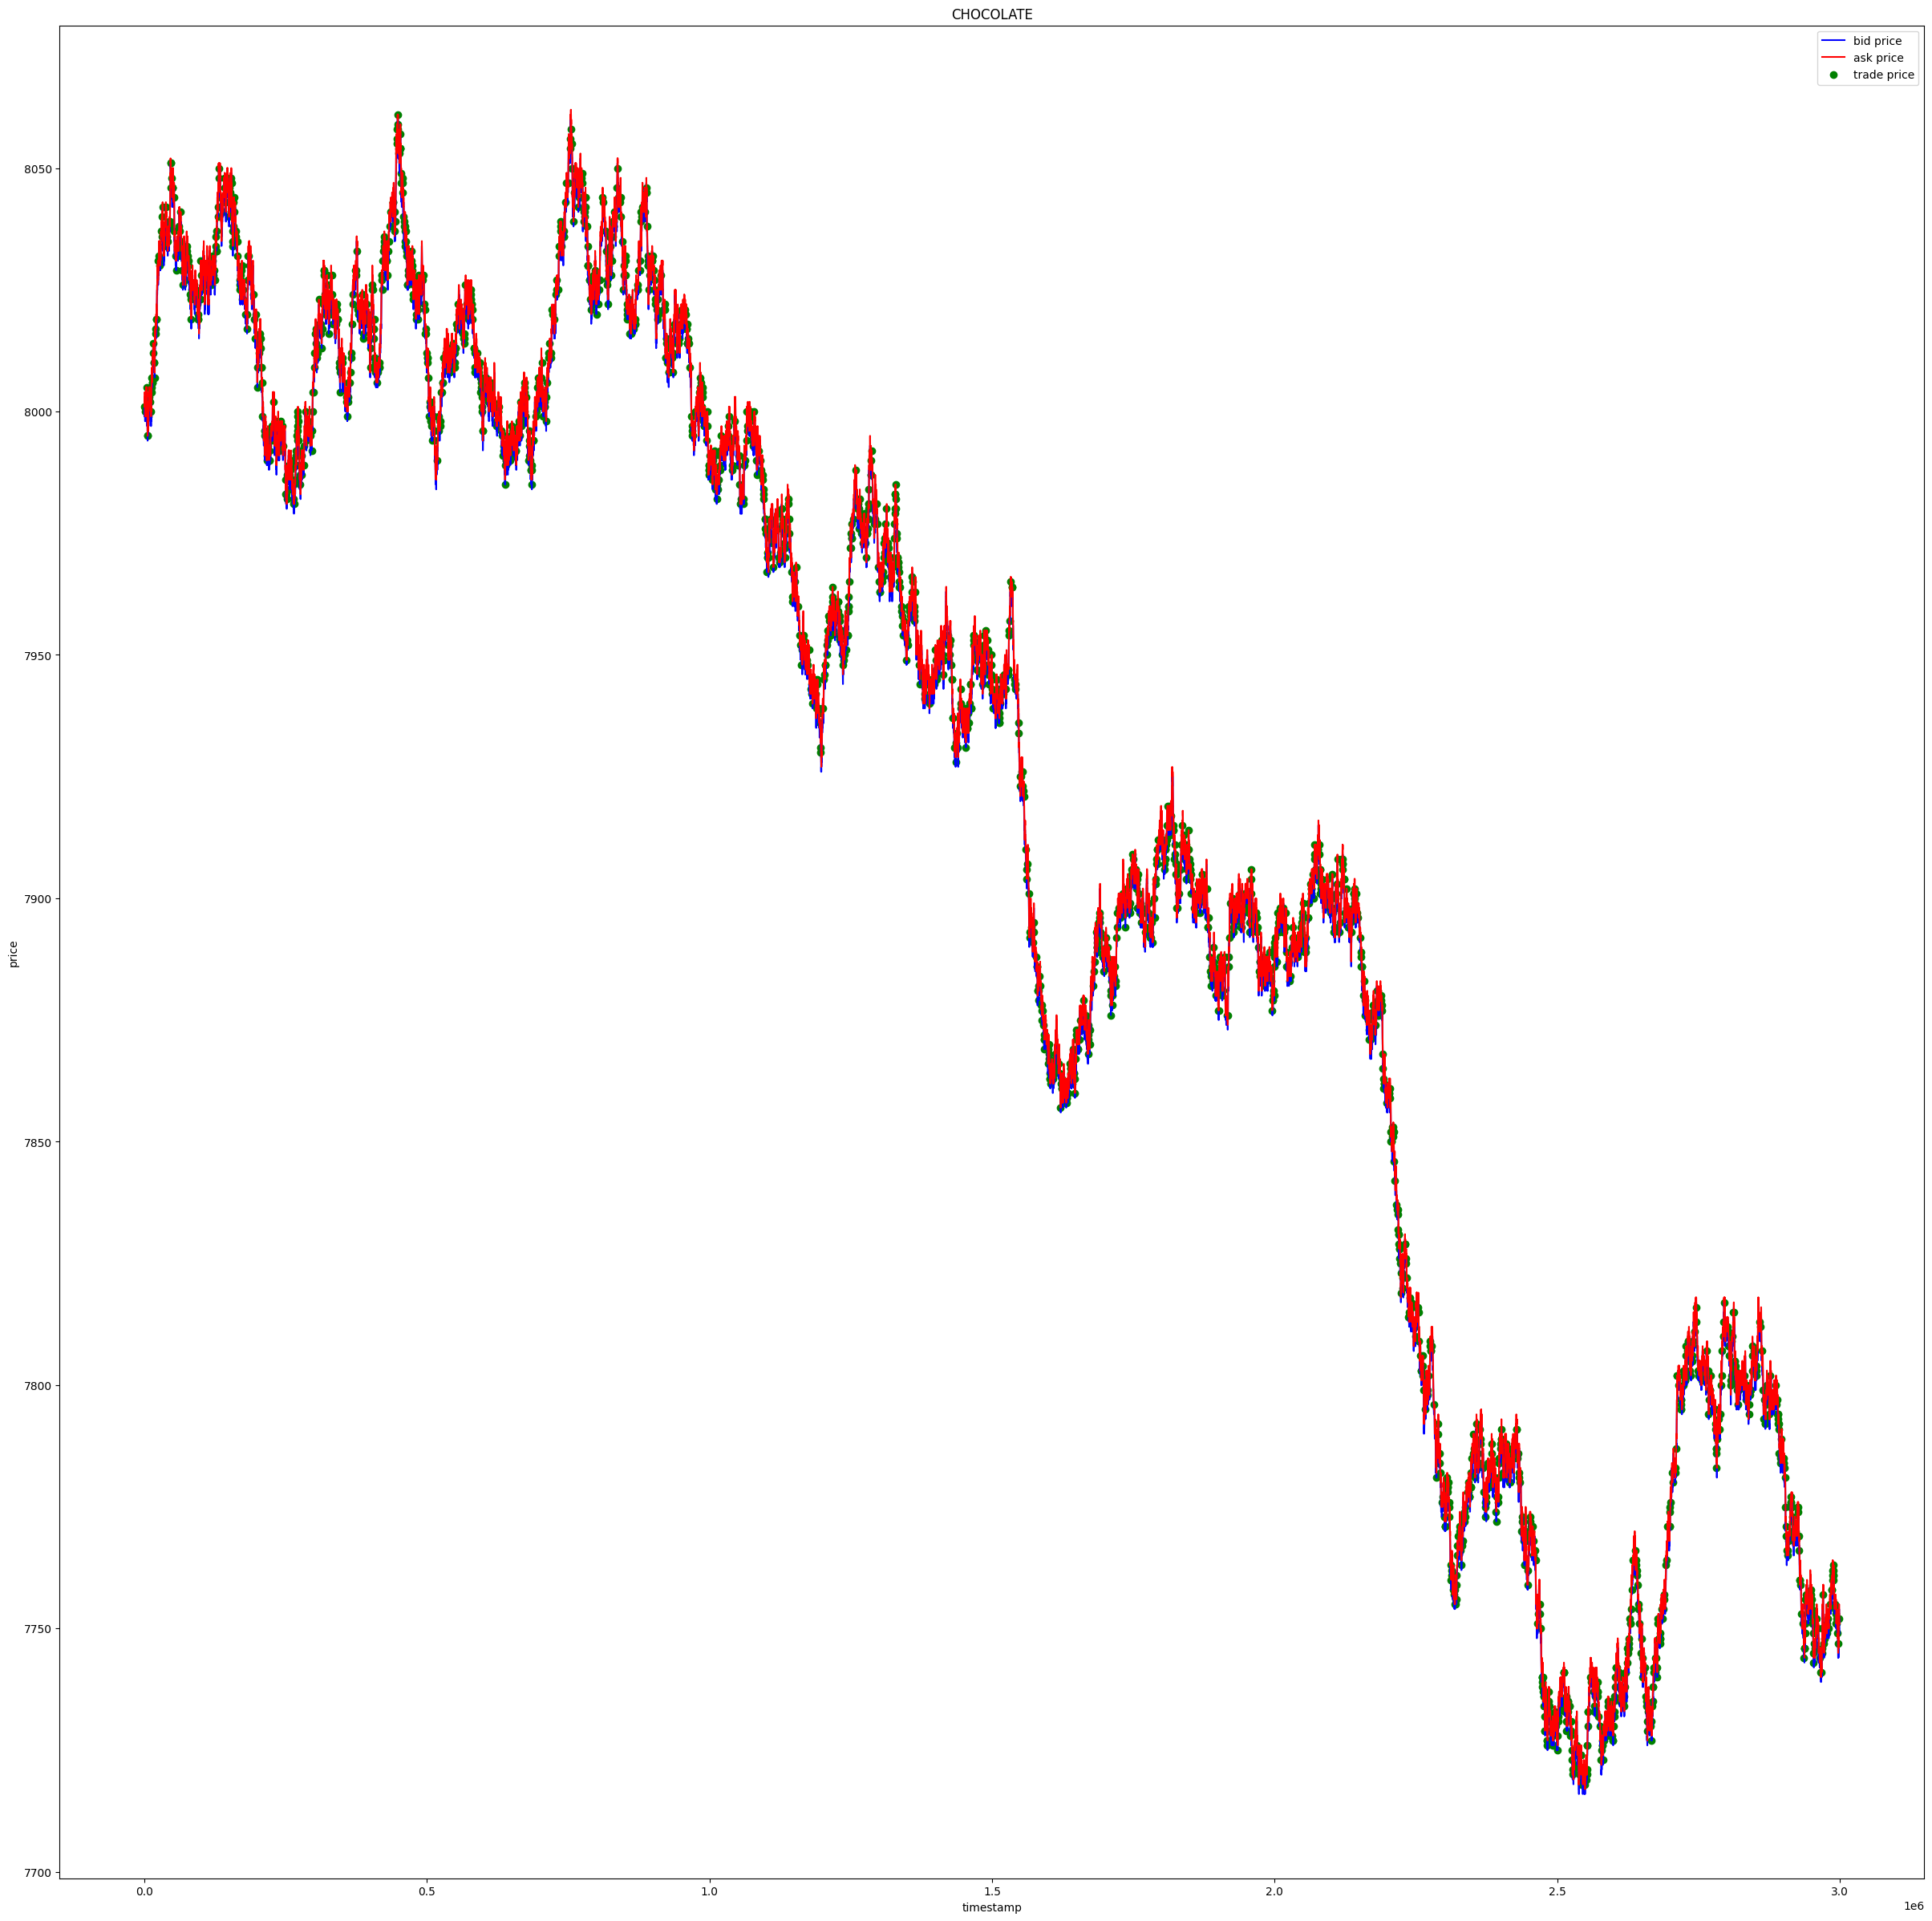

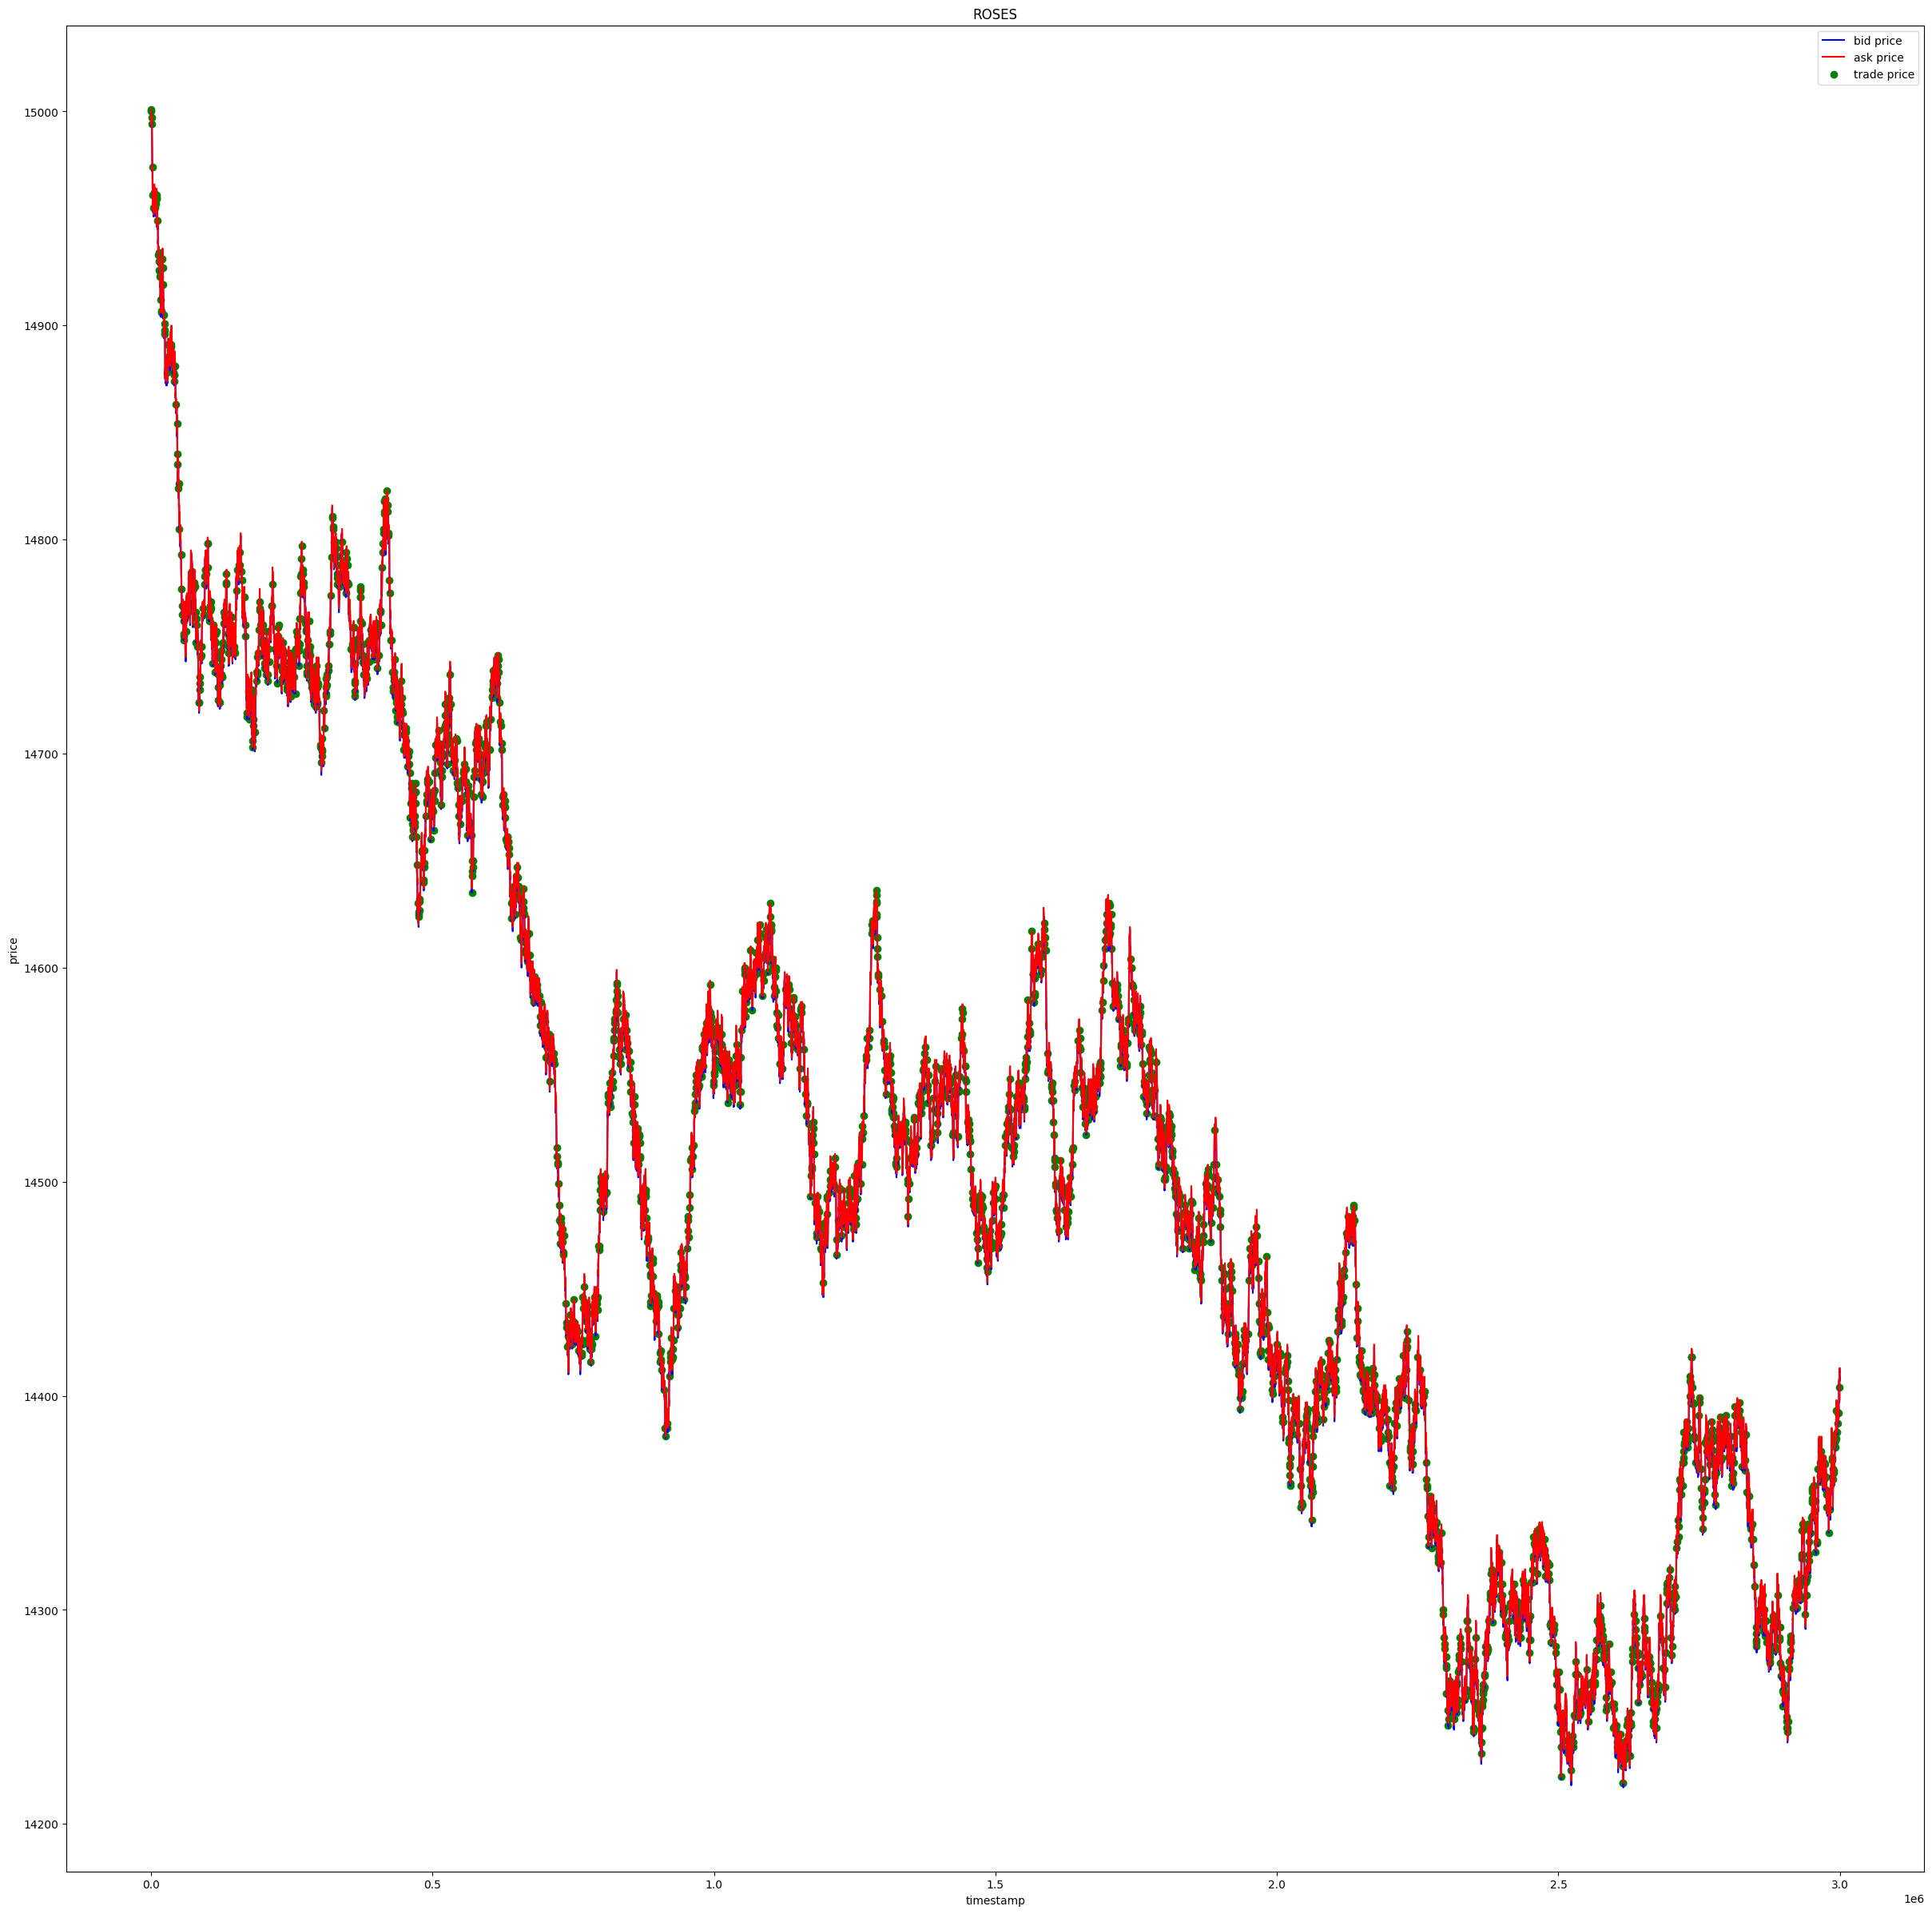

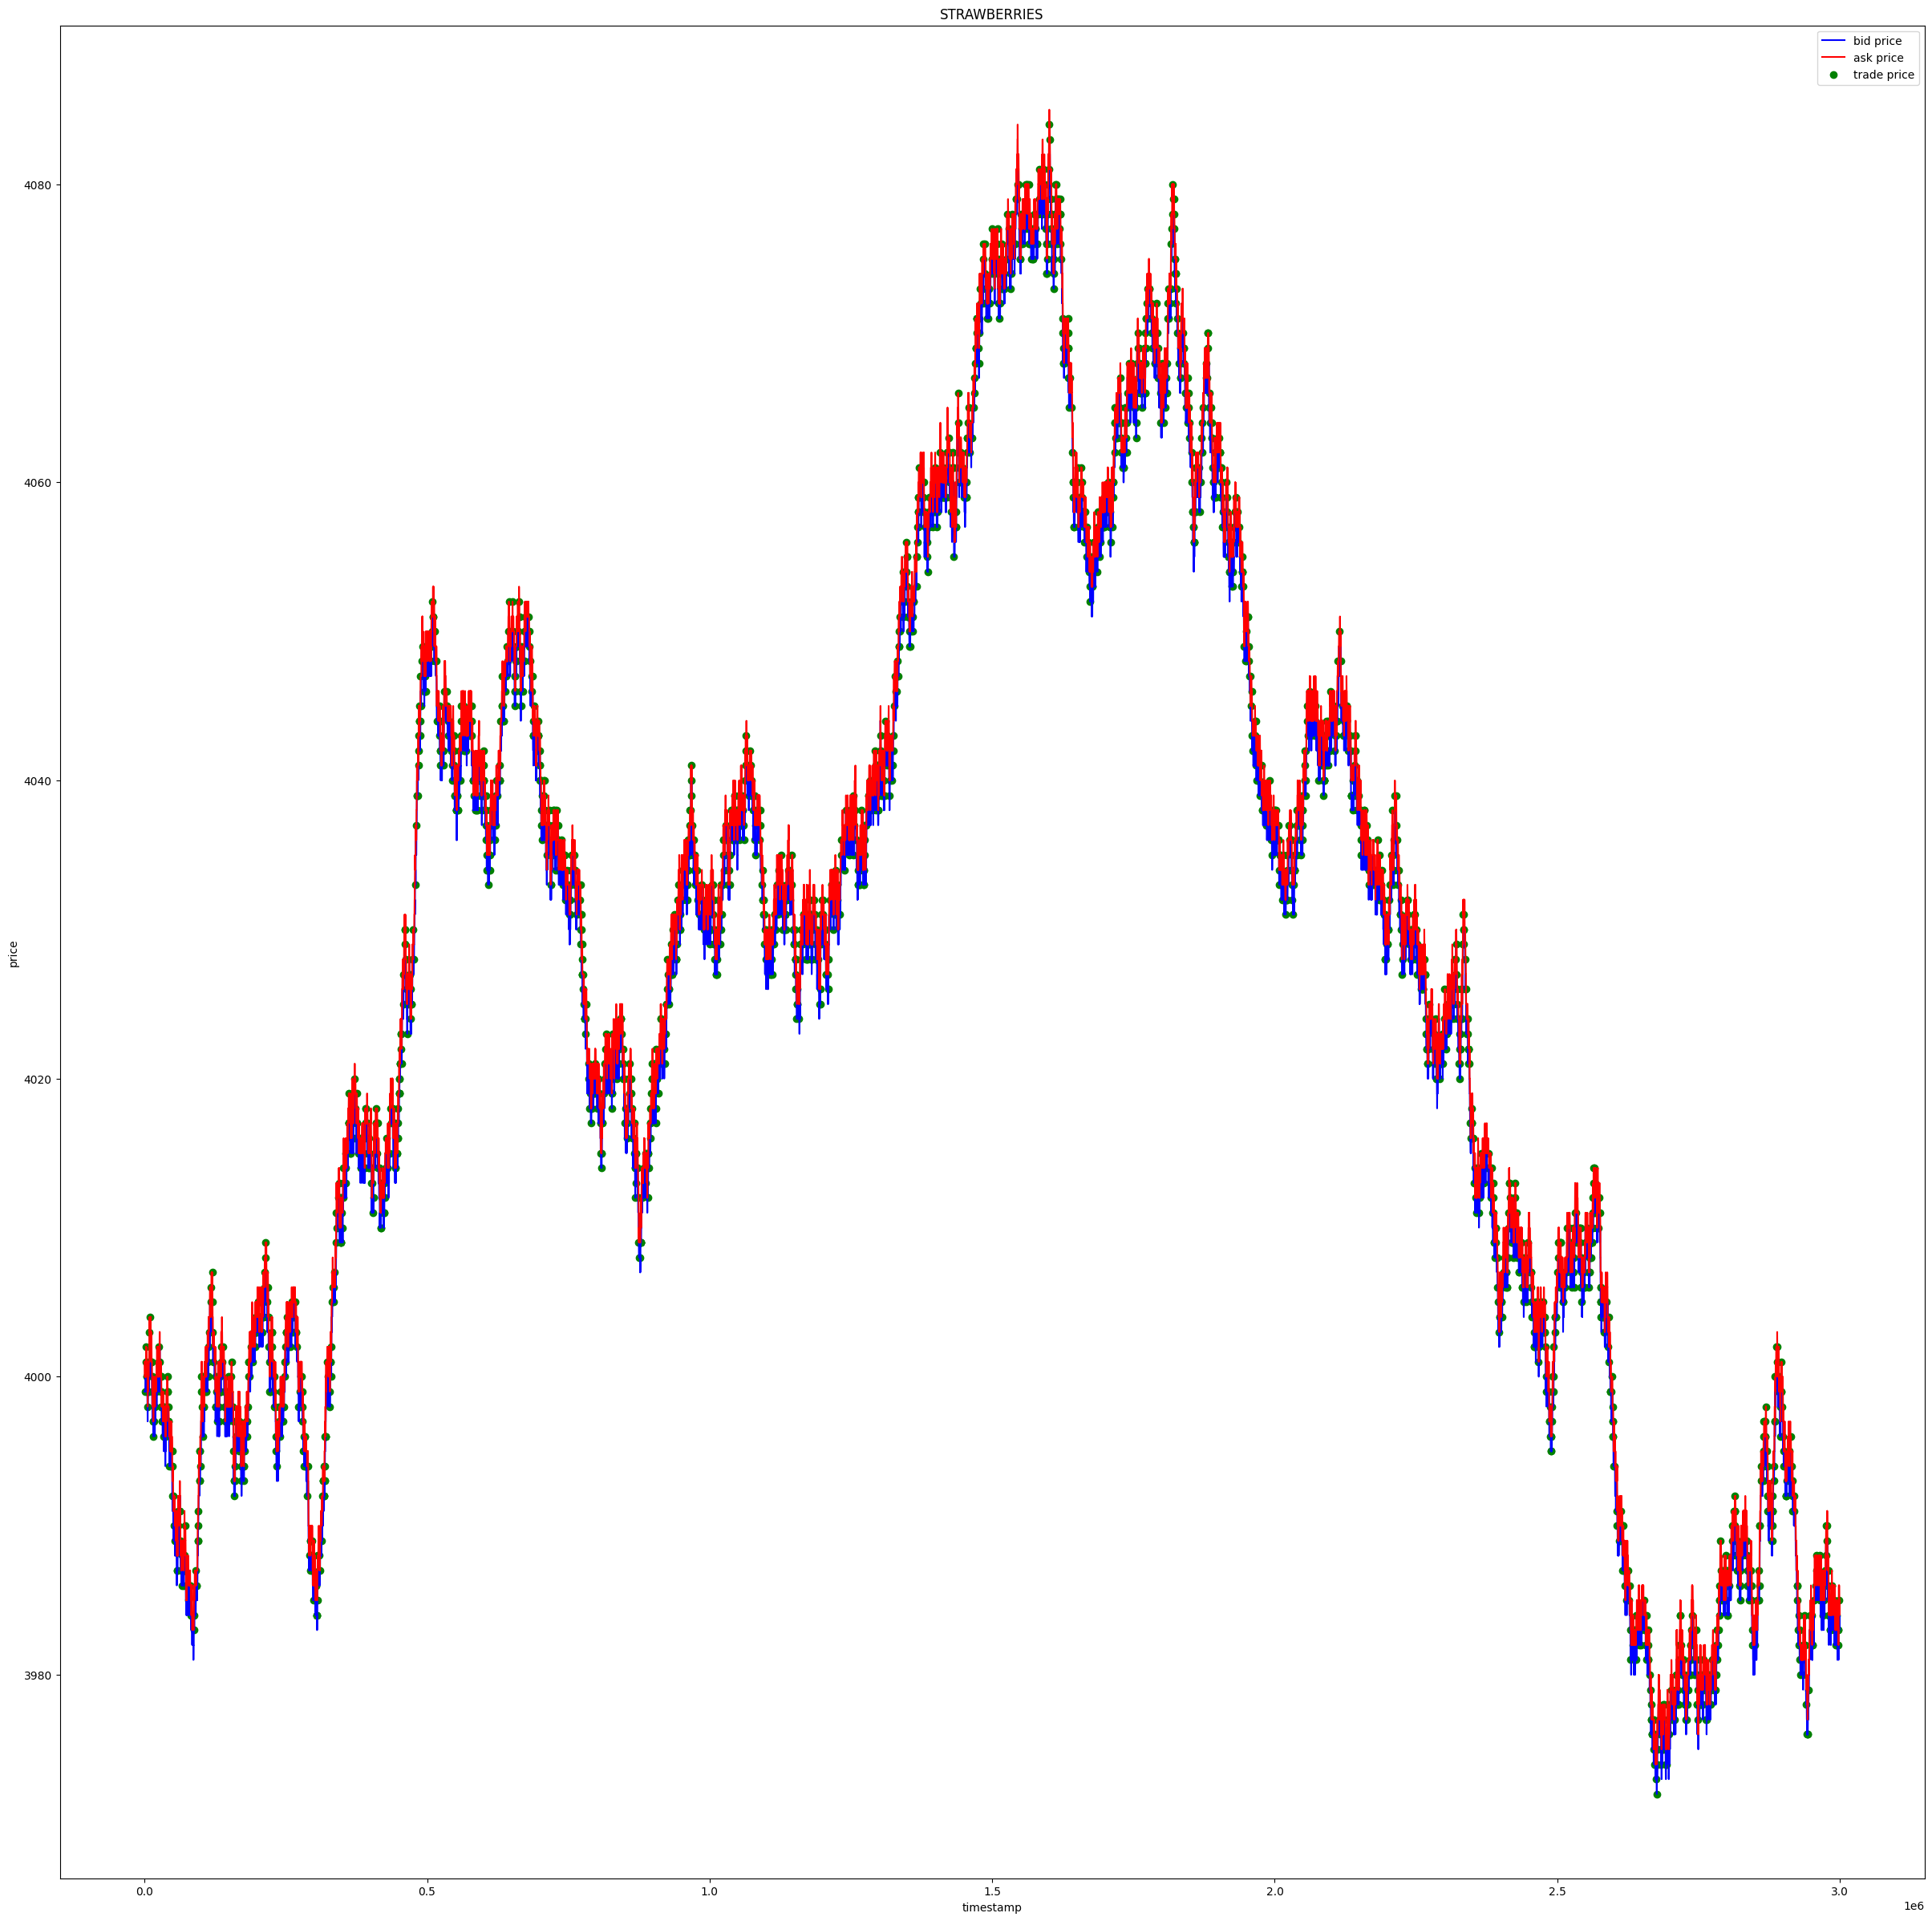

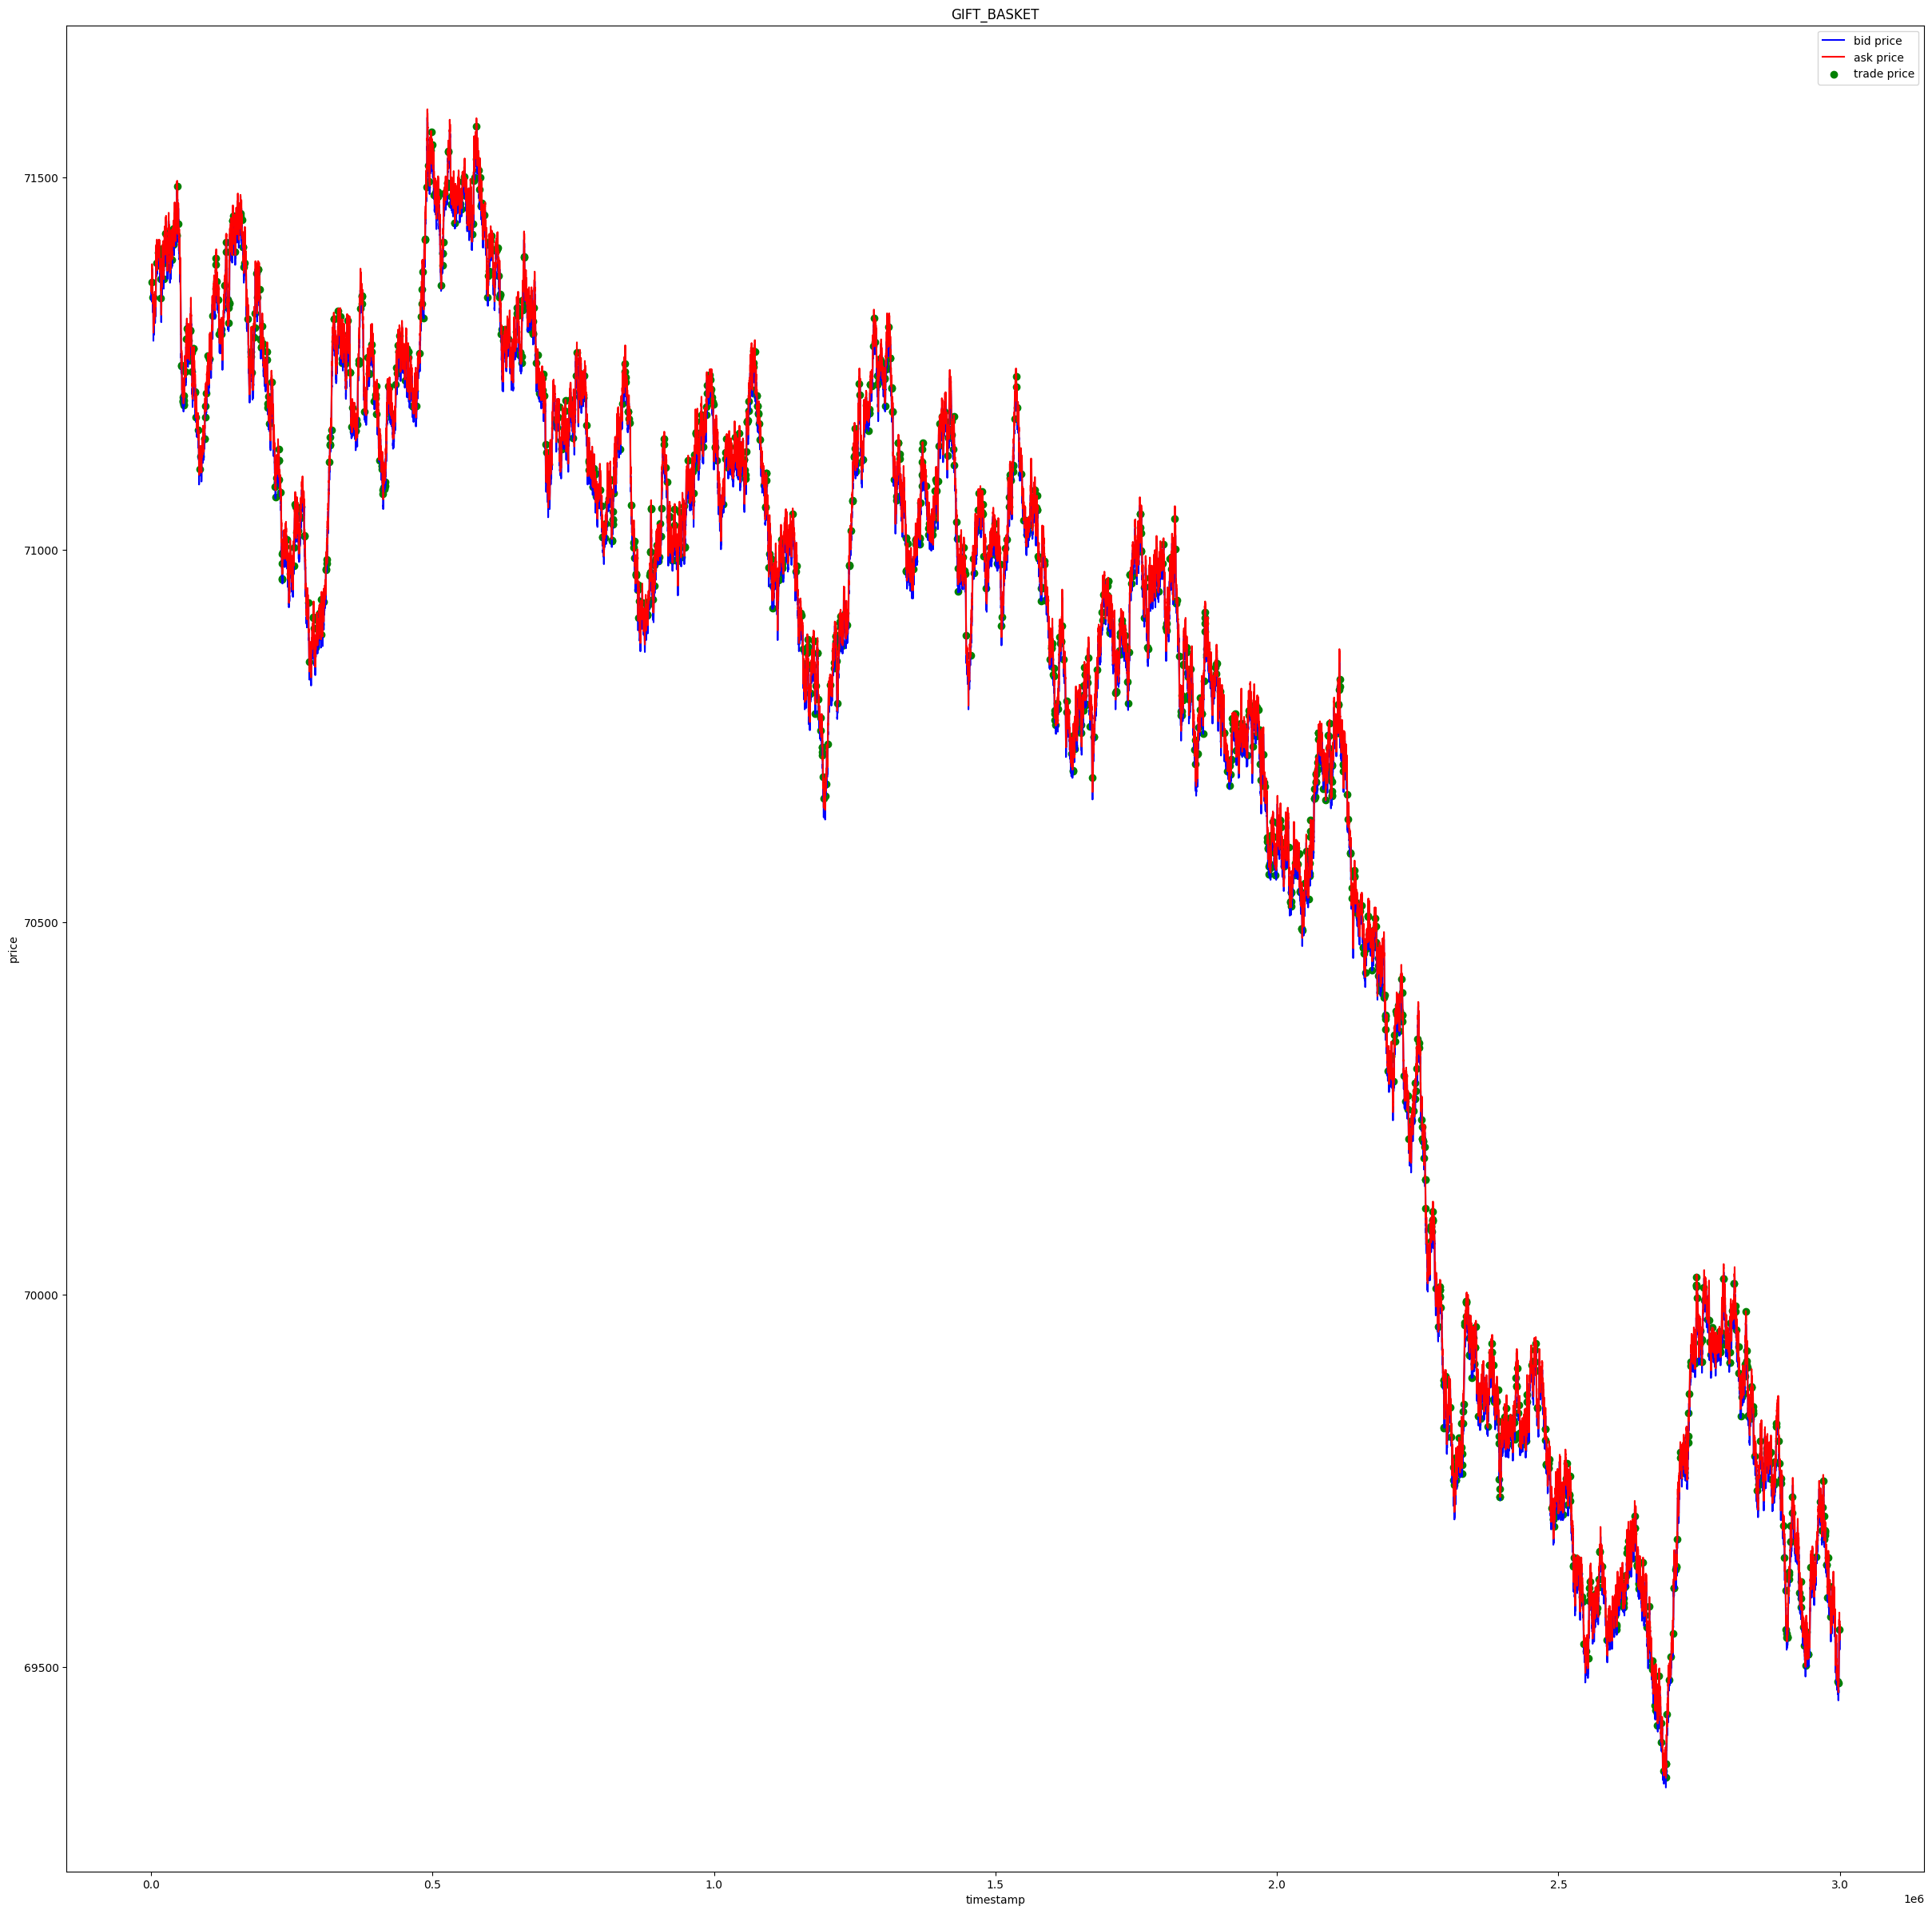

In [93]:
# plot all the bids, asks per product: CHOCOLATE, ROSES, STRAWBERRIES, and GIFT_BASKET

products = ["CHOCOLATE", "ROSES", "STRAWBERRIES", "GIFT_BASKET"]

for product in products:
    product_prices = prices[prices["product"] == product]
    product_trades = trades[trades["symbol"] == product]

    fig, ax = plt.subplots(figsize=(30,30))
    ax.plot(product_prices["timestamp"], product_prices["bid_price_1"], label="bid price", color="blue")
    ax.plot(product_prices["timestamp"], product_prices["ask_price_1"], label="ask price", color="red")
    ax.scatter(product_trades["timestamp"], product_trades["price"], label="trade price", color="green")
    ax.set_title(product)
    ax.set_xlabel("timestamp")
    ax.set_ylabel("price")
    ax.legend()
    plt.show()

In [96]:
# Plot the price of the basket vs the value of the underlying products: 4 chocolates, 1 rose, 3 strawberries

# set index to timestamp
prices.set_index("timestamp", inplace=True)

chocolate_prices = prices[prices["product"] == "CHOCOLATE"]
rose_prices = prices[prices["product"] == "ROSES"]
strawberry_prices = prices[prices["product"] == "STRAWBERRIES"]
basket_prices = prices[prices["product"] == "GIFT_BASKET"]

basket_prices["underlying_value"] = 4 * chocolate_prices["mid_price"] + rose_prices["mid_price"] + 3 * strawberry_prices["mid_price"]

basket_prices["value_ratio"] = basket_prices["mid_price"] / basket_prices["underlying_value"]

# reset index
prices.reset_index(inplace=True)

basket_prices.reset_index(inplace=True)

/var/folders/r2/pw988w7d4qj5t2yych02l3m80000gp/T/ipykernel_92463/1804094093.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_prices["underlying_value"] = 4 * chocolate_prices["mid_price"] + rose_prices["mid_price"] + 3 * strawberry_prices["mid_price"]
/var/folders/r2/pw988w7d4qj5t2yych02l3m80000gp/T/ipykernel_92463/1804094093.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_prices["value_ratio"] = basket_prices["mid_price"] / basket_prices["underlying_value"]


In [98]:


# plot the value_ratio of the basket

fig, ax = plt.subplots(figsize=(100,100))
ax.plot(basket_prices["timestamp"], basket_prices["value_ratio"], label="basket price", color="blue")

# Linear Regression

In [35]:
trades['total'] = trades['price'] * trades['quantity']
trades.rename(columns={'symbol':'product'}, inplace = True)
trade_summary = trades.groupby(['timestamp','product']).agg({'quantity':'sum', 'total':'sum'})
trade_summary['vwap'] = trade_summary['total']/ trade_summary['quantity']
trade_summary.reset_index(inplace = True)

data = pd.merge(prices, trade_summary, on = ['timestamp','product'], how="left")
data[['quantity','total','vwap']] = data.groupby('product')[['quantity','total','vwap']].fillna(method='ffill')
data[['quantity','total','vwap']] = data.groupby('product')[['quantity','total','vwap']].shift()
data.set_index('timestamp', inplace = True)
data[['bid_volume_1','bid_volume_2','bid_volume_3','ask_volume_1','ask_volume_2','ask_volume_3']] = data[['bid_volume_1','bid_volume_2','bid_volume_3','ask_volume_1','ask_volume_2','ask_volume_3']].fillna(0)


In [37]:
data['total_bid_volume'] = data[['bid_volume_1','bid_volume_2','bid_volume_3']].sum(axis = 1)
data['total_ask_volume'] = data[['ask_volume_1','ask_volume_2','ask_volume_3']].sum(axis = 1)

In [38]:
data['imbalance'] = (data['total_bid_volume'] - data['total_ask_volume']) / (data['total_bid_volume'] + data['total_ask_volume'])

In [ ]:
product = ["CHOCOLATE", "ROSES", "STRAWBERRIES", "GIFT_BASKET"]
product = "CHOCOLATE"

<Axes: xlabel='mid_price', ylabel='Density'>

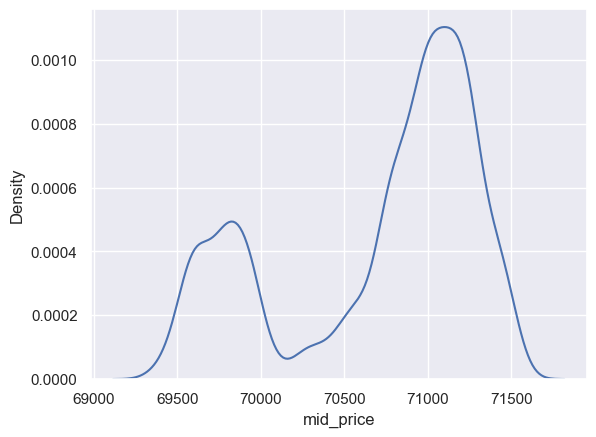

In [17]:
sns.kdeplot(prices[prices["product"] == 'GIFT_BASKET'].mid_price)